In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns


In [823]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_ID = pd.read_csv('Customer_ID.csv')
transaction_ID = pd.read_csv('transaction_ID.csv')

In [351]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [868]:
# Change numeric SAS date format to YYYY/MM/DD
x = cab_data['Date of Travel'].to_list()
base_date = pd.Timestamp('1900-1-1')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in x]
cab_data['Date of Travel'] = pd.to_datetime(dates, format='%Y-%m-%d %H:%M:%S')


In [353]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [354]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [355]:
duplicate_rows = cab_data[cab_data.duplicated()]
duplicate_rows

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


In [744]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [824]:
city['Population'] = city ['Population'].str.replace(',','')
city['Population'] = city ['Population'].astype(float)

city['Users'] = city ['Users'].str.replace(',','')
city['Users'] = city ['Users'].astype(float)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [358]:
duplicate_rows = city[city.duplicated()]
duplicate_rows

,City,Population,Users


In [359]:
customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [360]:
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [361]:
duplicate_rows = customer_ID[customer_ID.duplicated()]
duplicate_rows

,Customer ID,Gender,Age,Income (USD/Month)


In [362]:
transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [363]:
transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [364]:
duplicate_rows = transaction_ID[transaction_ID.duplicated()]
duplicate_rows

,Transaction ID,Customer ID,Payment_Mode


<h2> JOINS </h2>

In [365]:
# LEFT JOIN of Cab_Data & Transaction_ID on 'Transaction ID'

cab_data_join = pd.merge(cab_data, transaction_ID, on = 'Transaction ID', how = 'left')
cab_data_join.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [851]:
# LEFT JOIN cab_data_join & Customer_ID on 'Customer_ID'

cab_data_master = pd.merge(cab_data_join, customer_ID, on = 'Customer ID', how = 'left')
cab_data_master.info()

# Save joint master file for vizualizations with Tableau
#cab_data_master.to_csv('g2m_viz.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [367]:
# LEFT JOIN Transaction_ID & Customer_ID on 'Customer_ID'

customers = pd.merge(transaction_ID, customer_ID, on = 'Customer ID', how ='left')
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Transaction ID      440098 non-null  int64 
 1   Customer ID         440098 non-null  int64 
 2   Payment_Mode        440098 non-null  object
 3   Gender              440098 non-null  object
 4   Age                 440098 non-null  int64 
 5   Income (USD/Month)  440098 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 23.5+ MB


In [368]:
unidentified_transactions = pd.merge(transaction_ID, cab_data, on = 'Transaction ID', how ='left')
unidentified_transactions.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel    80706
Company           80706
City              80706
KM Travelled      80706
Price Charged     80706
Cost of Trip      80706
dtype: int64

In [369]:
incomplete_t = unidentified_transactions[unidentified_transactions['Date of Travel'].isnull()]
incomplete_t = incomplete_t[['Transaction ID', 'Customer ID', 'Payment_Mode']]
incomplete_t.head()

,Transaction ID,Customer ID,Payment_Mode
192,10000203,43177,Card
193,10000204,44348,Cash
194,10000205,44599,Cash
195,10000206,44264,Cash
196,10000207,43369,Cash


<h3> Cab_Data's PK is Transaction ID with 359,392 entries. Transaction_ID table has 80,706 more entries, which we can not asign to neither Yellow or Pink Cab. This amounts to 18.34% of incomplete transactions</h3>

In [370]:
# LEFT JOIN unidentified_t with Customer_ID on Customer ID

incomplete_t = pd.merge(incomplete_t, customer_ID, on = 'Customer ID', how = 'left')
incomplete_t.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000203,43177,Card,Male,52,3266
1,10000204,44348,Cash,Male,22,29304
2,10000205,44599,Cash,Male,35,5157
3,10000206,44264,Cash,Male,41,13981
4,10000207,43369,Cash,Male,31,18561


<H1>EDA </H1>

In [371]:
# Number of transactions per company
nr_tr_per_com = cab_data_master['Company'].value_counts()
df = pd.DataFrame.from_dict(nr_tr_per_com)
display(df)

,Company
Yellow Cab,274681
Pink Cab,84711


In [882]:
# Subsets
yellow_cab = cab_data_master[cab_data_master['Company'] == 'Yellow Cab']
pink_cab = cab_data_master[cab_data_master['Company'] == 'Pink Cab']


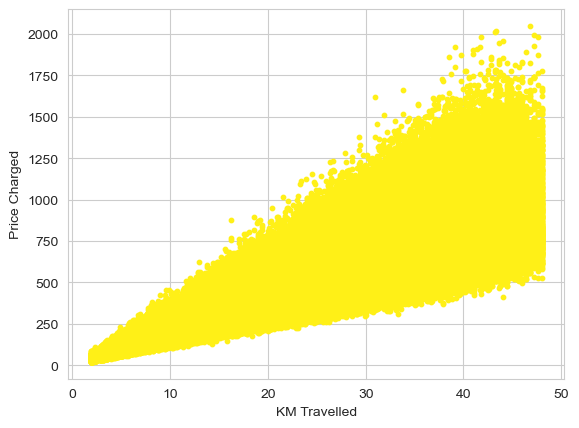

In [373]:
# checking for outliers
exceptions_y = plt.scatter(yellow_cab['KM Travelled'], yellow_cab['Price Charged'], color = '#FFF017', s=10)

# set the labels and title
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')

plt.show(exceptions_y)

<h3> Exceptional long and high priced rides can skew the average profit per ride. Let's check distribution of rides accross 'KM Travelled'</h3>

In [374]:
yellow_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,22.569517,458.181990,297.922004,19428.831732,35.341112,15045.669817
std,1.269829e+05,12.234298,288.386166,162.548986,21830.791423,12.578625,7962.727062
min,1.000038e+07,1.900000,20.730000,22.800000,1.000000,18.000000,2000.000000
25%,1.011084e+07,11.990000,226.680000,158.400000,2403.000000,25.000000,8439.000000
50%,1.021987e+07,22.440000,425.060000,295.596000,6445.000000,33.000000,14676.000000
75%,1.032939e+07,32.960000,633.880000,432.432000,38916.000000,42.000000,21023.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,34996.000000


<p>IQR of Price Charged:</p>
<p>IQR = Q3 - Q1</p>
<p><b>IQR</b> = 633.88 - 226.68 = <b>407.2</b></p>
<p>A commonly used rule of thumb for identifying potential outliers is based on the interquartile range (IQR). An observation is considered a potential outlier if it is more than 1.5 times the IQR below Q1 or above Q3.</p>
<p> (max - Q3)/IQR = (2048.03 - 633.88) / 407.2 = 3.47 </p>

<p>MAX values of Price Charged and Cost of Trip do not corelate similar to the Q3, Q2 or Q1 values.</p>

In [375]:
max_price_charged = yellow_cab[yellow_cab['Price Charged'] > 1800]
max_price_charged.head(16)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
8159,10010287,2016-02-16,Yellow Cab,NEW YORK NY,47.60,1978.79,651.1680,2037,Card,Male,45,14655
19813,10025091,2016-04-11,Yellow Cab,NEW YORK NY,47.60,1875.11,616.8960,2780,Card,Male,38,8300
24687,10031184,2016-05-03,Yellow Cab,NEW YORK NY,46.40,1893.67,556.8000,305,Cash,Female,46,10177
27989,10035372,2016-05-16,Yellow Cab,NEW YORK NY,42.80,1812.55,549.5520,1272,Card,Male,20,11743
36588,10046260,2016-06-21,Yellow Cab,NEW YORK NY,44.46,1827.10,592.2072,1822,Cash,Male,47,24939
38492,10048604,2016-06-28,Yellow Cab,NEW YORK NY,46.00,1825.42,640.3200,1319,Card,Male,22,4317
111171,10136151,2017-01-08,Yellow Cab,SILICON VALLEY,40.95,1878.58,530.7120,14685,Cash,Male,51,3675
111180,10136160,2017-01-08,Yellow Cab,SILICON VALLEY,41.34,1908.87,520.8840,13251,Card,Female,47,4287
114844,10140740,2017-01-24,Yellow Cab,NEW YORK NY,46.80,1825.98,651.4560,311,Card,Female,45,16796
119266,10146396,2017-02-14,Yellow Cab,NEW YORK NY,45.63,1800.42,651.5964,2033,Card,Male,20,23992


In [376]:
pink_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,8.471100e+04,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,1.022394e+07,22.559917,310.800856,248.148682,18422.581577,35.322414,15059.047137
std,1.261782e+05,12.231092,181.995661,135.403345,18084.830799,12.644780,7991.077762
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011014e+07,12.000000,159.970000,131.868000,5317.500000,25.000000,8371.000000
50%,1.022590e+07,22.440000,298.060000,246.330000,8876.000000,33.000000,14713.000000
75%,1.033642e+07,32.960000,441.505000,360.180000,27190.000000,42.000000,21055.000000
max,1.043762e+07,48.000000,1623.480000,576.000000,60000.000000,65.000000,35000.000000


<h3>It appears that the difference between Price Charged and Cost of Trip gets bigger by Price Charged being higher</h3>

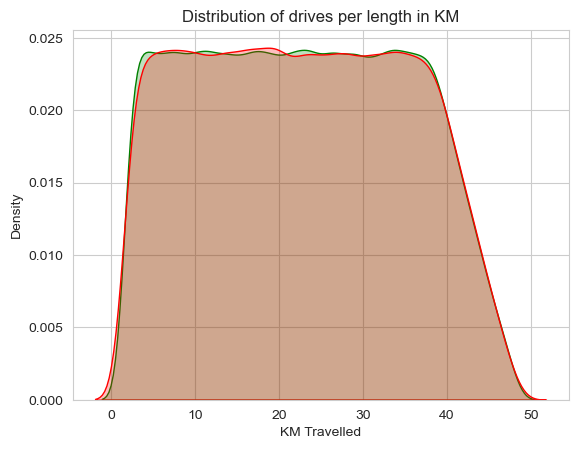

In [377]:
sns.set_style('whitegrid')
sns.kdeplot(yellow_cab['KM Travelled'], fill = True, color = 'green', label = 'Yellow Cab')
sns.kdeplot(pink_cab['KM Travelled'], fill = True, color = 'red', label = 'Pink Cab' )
plt.title('Distribution of drives per length in KM')
plt.xlabel('KM Travelled')
plt.show()

<h3> The descision is not to remove any outliers because of the project's context. When checking the distribution of rides per length within each company, it is a normal curve. This suggests that none of the companies are given an advatage in only taking more profitible longer rides</h3>

<h1>Analysis</h1>

<h3>Hypothesis: </h3>
<p>1. Which company has a higher profit margin per year?</p>
<p>2. Which cities have highest cab usage average?</p>
<p>3. Is there a sesonal increase in cab rides (quarters months)?</p>
<p>4. Which company has a higher customer retention rate and what customer segment are the returning users (gender, age, earnings)?</p>
<p>5. Which company has a higher annual user growth?</p>



<h2>1. Which company has a higher profit margin per year?</h2>

In [532]:
annual_r = cab_data_master.groupby([cab_data_master['Date of Travel'].dt.year, 'Company'])['Price Charged'].sum()
annual_cot = cab_data_master.groupby([cab_data_master['Date of Travel'].dt.year, 'Company'])['Cost of Trip'].sum()
annual_profit = annual_r - annual_cot
gross_profit = ((annual_profit / annual_r) * 100).round(2)

# Converting Series back to DataFrames and creating pivot tables to reshape the data
annual_profit = annual_profit.reset_index(name='')
pivot_gp = annual_profit.pivot(index='Date of Travel', columns = 'Company', values = '')

gross_profit = gross_profit.reset_index(name='')
pivot_gpm = gross_profit.pivot(index='Date of Travel', columns = 'Company', values = '')

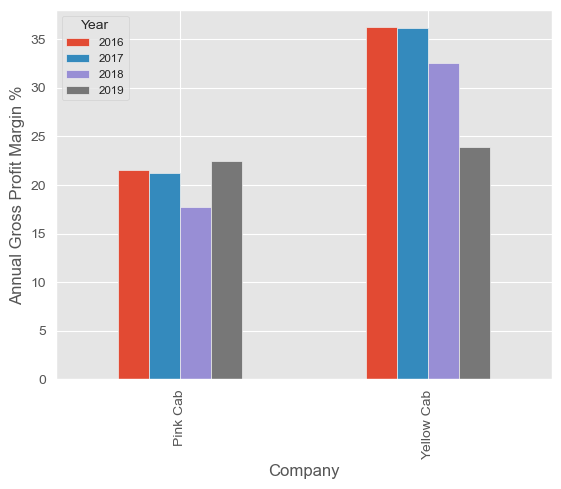

In [528]:
# Vizualizing gross profit margin

ax = pivot_gp.T.plot(kind ='bar', ylabel ='Annual Gross Profit Margin %')
legend = plt.legend(title= 'Year', loc=2, fontsize='small', fancybox=True)


In [767]:
# Revenue values 
pd.options.display.float_format = '{:.2f}'.format
pivot_gp

Company,Pink Cab,Yellow Cab
Date of Travel,,
2016,1686457.51,13786935.95
2017,2033435.13,16586614.06
2018,1578972.46,13609461.48
2019,8463.21,37361.68


<h3> Yellow Cab has higher annual gross profit margin. (Data max date: January 2019) </h3>

<h2> Average ride profit and cost </h2>

In [ ]:
Y_PCM = yellow_cab['Price Charged'].mean()
P_PCM = pink_cab['Price Charged'].mean()

Y_COTM = yellow_cab['Cost of Trip'].mean()
P_COTM = pink_cab['Cost of Trip'].mean()


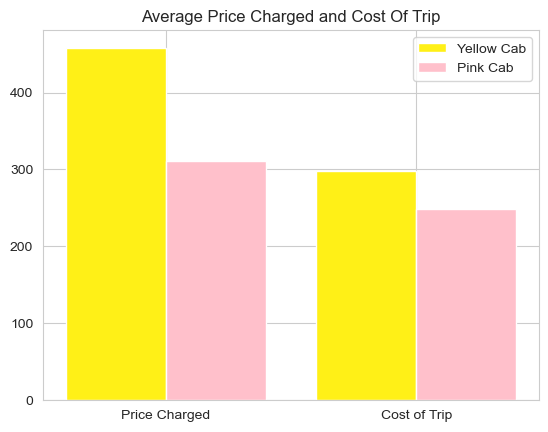

In [ ]:
# Average price and cost of trip per company 

X = ['Price Charged','Cost of Trip']
Y_yellow = [Y_PCM, Y_COTM]
Z_pink = [P_PCM, P_COTM]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y_yellow, 0.4, color ='#FFF017', label = 'Yellow Cab')
plt.bar(X_axis + 0.2, Z_pink, 0.4, color ='pink', label = 'Pink Cab')
  
plt.xticks(X_axis, X)
plt.title('Average Price Charged and Cost Of Trip')
plt.legend()
plt.show()

In [604]:
p_rate_y = (Y_PCM - Y_COTM).round(2)
p_rate_p = (P_PCM - P_COTM).round(2)

print('Averge profit per drive 2016 - 2019 (January):')
print('Yellow cab:', p_rate_y, '$')
print('Pink cab:', p_rate_p, '$')

Averge profit per drive 2016 - 2019 (January):
Yellow cab: 160.26 $
Pink cab: 62.65 $


<h2>2. Which cities have highest cab usage per population? Which company has most users in those cities?</h2>

In [825]:
# Count number of transcations per City
transactions = cab_data_master.groupby(['City'])['Transaction ID'].count()
transactions = transactions.to_frame()
transactions

,Transaction ID
City,
ATLANTA GA,7557
AUSTIN TX,4896
BOSTON MA,29692
CHICAGO IL,56625
DALLAS TX,7017
DENVER CO,3825
LOS ANGELES CA,48033
MIAMI FL,6454
NASHVILLE TN,3010


In [826]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837.00,302149.00
1,CHICAGO IL,1955130.00,164468.00
2,LOS ANGELES CA,1595037.00,144132.00
3,MIAMI FL,1339155.00,17675.00
4,SILICON VALLEY,1177609.00,27247.00


In [827]:
# Join data frames
t_per_city = pd.merge(city, transactions, on = 'City', how = 'left')

In [828]:
t_per_city = t_per_city.rename(columns={'Transaction ID': 'Sum of Transactions'})
pd.options.display.float_format = '{:.2f}'.format
t_per_city.head(19)

,City,Population,Users,Sum of Transactions
0,NEW YORK NY,8405837.00,302149.00,99885.00
1,CHICAGO IL,1955130.00,164468.00,56625.00
2,LOS ANGELES CA,1595037.00,144132.00,48033.00
3,MIAMI FL,1339155.00,17675.00,6454.00
4,SILICON VALLEY,1177609.00,27247.00,8519.00
5,ORANGE COUNTY,1030185.00,12994.00,3982.00
6,SAN DIEGO CA,959307.00,69995.00,20488.00
7,PHOENIX AZ,943999.00,6133.00,2064.00
8,DALLAS TX,942908.00,22157.00,7017.00
9,ATLANTA GA,814885.00,24701.00,7557.00


In [829]:
t_per_city[t_per_city['City'] == 'SAN FRANCISCO CA']

,City,Population,Users,Sum of Transactions
14,SAN FRANCISCO CA,629591.00,213609.00,NaN


<p>Allthough we have 213,609 users registered in SAN FRANCISCO CA, there are no records of transactions made in that area.</p>
<p>We will drop these rows:</p>

In [830]:
mask =  t_per_city['City'] == 'SAN FRANCISCO CA'
drop_rows = t_per_city[mask].index
t_per_city = t_per_city.drop(drop_rows)

In [900]:
t_per_city['P&Y Cab use per 1000'] = (t_per_city['Sum of Transactions'] / city['Population']) * 1000

t_per_city = t_per_city.sort_values(by = 'Users', ascending = False)
t_per_city

,City,Population,Users,Sum of Transactions,Cab use per 1000,P&Y Cab use per 1000
0,NEW YORK NY,8405837.00,302149.00,99885.00,11.88,11.88
1,CHICAGO IL,1955130.00,164468.00,56625.00,28.96,28.96
2,LOS ANGELES CA,1595037.00,144132.00,48033.00,30.11,30.11
17,WASHINGTON DC,418859.00,127001.00,43737.00,104.42,104.42
19,BOSTON MA,248968.00,80021.00,29692.00,119.26,119.26
6,SAN DIEGO CA,959307.00,69995.00,20488.00,21.36,21.36
4,SILICON VALLEY,1177609.00,27247.00,8519.00,7.23,7.23
12,SEATTLE WA,671238.00,25063.00,7997.00,11.91,11.91
9,ATLANTA GA,814885.00,24701.00,7557.00,9.27,9.27
8,DALLAS TX,942908.00,22157.00,7017.00,7.44,7.44


<AxesSubplot: xlabel='City'>

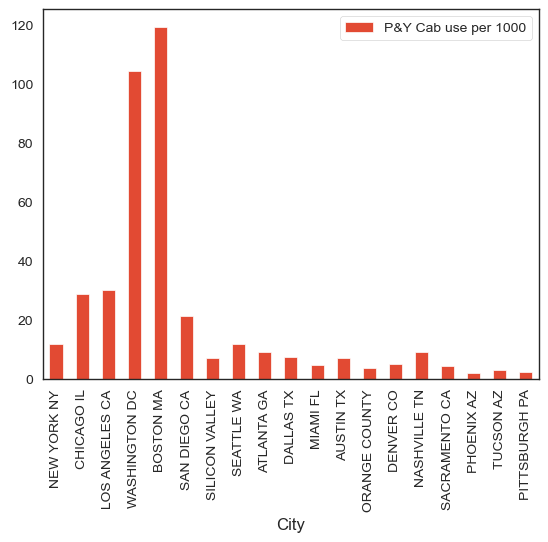

In [901]:
# Top cab use per 1000
t_per_city.plot.bar(x = 'City', y ='P&Y Cab use per 1000')


In [890]:
top_cities = cab_data_master[(cab_data_master['City'] == 'BOSTON MA') | (cab_data_master['City'] == 'WASHINGTON DC')]
active_users = top_cities.groupby(['Company', 'City'])['Transaction ID'].count()
active_users.to_frame()

Transaction ID
Company    City                         
Pink Cab   BOSTON MA                5186
           WASHINGTON DC            3692
Yellow Cab BOSTON MA               24506
           WASHINGTON DC           40045

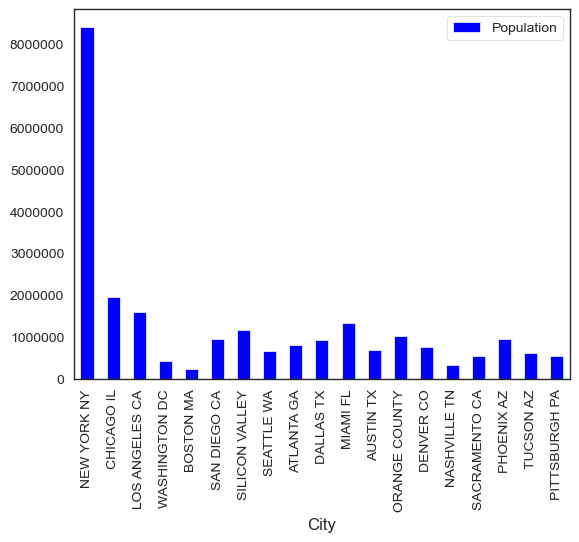

In [892]:
# Top Population
t_per_city.plot.bar(x = 'City', y ='Population', color = 'blue')
plt.ticklabel_format(style='plain', axis='y')

<p>Trend - Yellow and Pink Cab do not dominate in Cab use per 1000 in the most populated cities.</p>

<h2>3. Is there a sesonal increase in cab rides (months, quarters)?</h2>

In [ ]:
yellow_cab['Year Quater'] = yellow_cab['Date of Travel'].dt.to_period('Q')
quaters_y = yellow_cab.groupby('Year Quater')

nr_rides_y = quaters['Transaction ID'].count()

pink_cab['Year Quater'] = pink_cab['Date of Travel'].dt.to_period('Q')
quaters_p = pink_cab.groupby('Year Quater')

nr_rides_p = quaters_p['Transaction ID'].count()

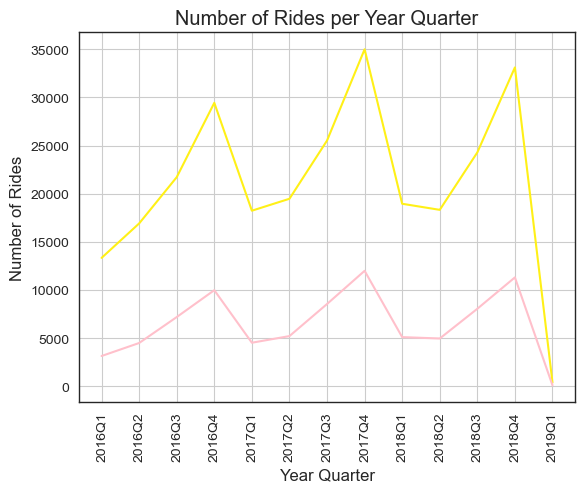

In [889]:
# Plot line chart
plt.plot(nr_rides_y.index.astype(str), nr_rides_y.values, color = '#FFF017')
plt.plot(nr_rides_p.index.astype(str), nr_rides_p.values, color = 'pink')
plt.title('Number of Rides per Year Quarter')
plt.xlabel('Year Quarter')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90)

plt.grid(True)
plt.show()

<p>Both companies are in higher demand in Q4, allthough Yellow Cab significally dominates.</p>

In [ ]:
yellow_cab['Month'] = yellow_cab['Date of Travel'].dt.to_period('M')
month_y = yellow_cab.groupby('Month')

nr_rides_my = month_y['Transaction ID'].count()

pink_cab['Month'] = pink_cab['Date of Travel'].dt.to_period('M')
month_p = pink_cab.groupby('Month')

nr_rides_mp = month_p['Transaction ID'].count()

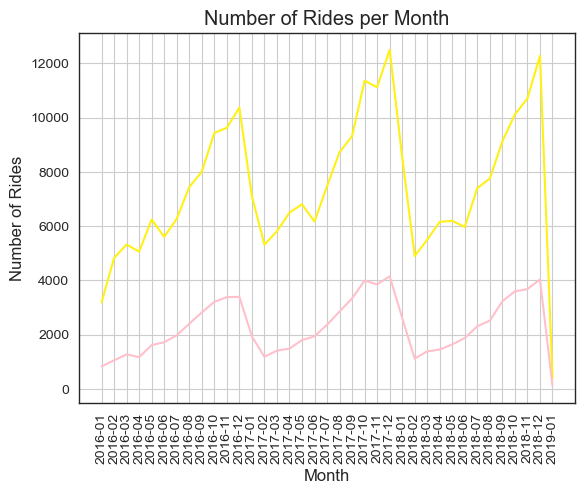

In [899]:
# Plot line chart
plt.plot(nr_rides_my.index.astype(str), nr_rides_my.values, color = '#FFF017')
plt.plot(nr_rides_mp.index.astype(str), nr_rides_mp.values, color = 'pink')
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90)

plt.grid(True)
plt.show()

<p>Both companies are in higher demand in December, allthough Yellow Cab significally dominates.</p>

<h2>4. Which company has a higher customer retention rate and what customer segment are the returning users (gender, age, earnings)?</h2>

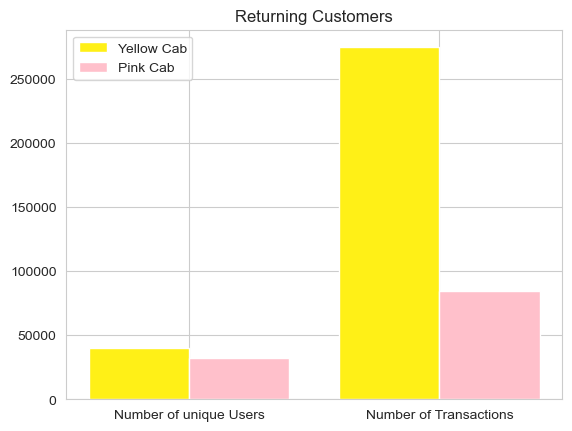

Average returning customer rate:
Yellow cab: 6.88
Pink Cab: 2.62


In [ ]:
# Number of unique customer ID and number of transactions er client (retained users vs one off users)

Y_customers = yellow_cab['Customer ID'].nunique()
P_customers = pink_cab['Customer ID'].nunique()

Y_nr_transactions = yellow_cab['Transaction ID'].count()
P_nr_transactions = pink_cab['Transaction ID'].count()

X = ['Number of unique Users', 'Number of Transactions']

Y_yellow = [Y_customers, Y_nr_transactions]
Z_pink = [P_customers, P_nr_transactions]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y_yellow, 0.4, color = '#FFF017', label = 'Yellow Cab')
plt.bar(X_axis + 0.2, Z_pink, 0.4, color ='pink', label = 'Pink Cab')
  
plt.xticks(X_axis, X)
plt.title('Returning Customers')
plt.legend()
plt.show()

Y_rate = (Y_nr_transactions / Y_customers).round(2)
print('Average returning customer rate:')
print('Yellow cab:', Y_rate)

P_rate = (P_nr_transactions / P_customers).round(2)
print('Pink Cab:', P_rate)


In [569]:
y_user_count = yellow_cab['Customer ID'].value_counts()
yellow_frequent = yellow_cab[yellow_cab['Customer ID'].isin(y_user_count[y_user_count >= 7].index)]

yellow_frequent['Gender'].value_counts()

Male      130272
Female     89376
Name: Gender, dtype: int64

In [574]:
a = (130272 / (130272 + 89376)) * 100
print('Male customers represent 59.31% of Yellow Cab frequent users.')

Male customers represent 59.31% of Yellow Cab frequent users.


In [575]:
yellow_frequent[['Income (USD/Month)', 'Age']].describe()

,Income (USD/Month),Age
count,219648.000000,219648.000000
mean,15062.650026,35.363272
std,7950.144631,12.591721
min,2003.000000,18.000000
25%,8487.000000,25.000000
50%,14689.000000,33.000000
75%,21022.000000,42.000000
max,34996.000000,65.000000


<h3> Average age of the the returning customers (used the cab service more than 6 times) is 35 with an avaerage income of 15062.65$ a month. Almost 60% of Yellow Cab's returning customers are male.</h3>

In [576]:
p_user_count = pink_cab['Customer ID'].value_counts()
pink_frequent = pink_cab[pink_cab['Customer ID'].isin(p_user_count[p_user_count >= 3].index)]

pink_frequent['Gender'].value_counts()

Male      32803
Female    24678
Name: Gender, dtype: int64

In [579]:
b = (32803 / (32803 + 24678)) * 100
print('Male customers represent 57.07% of Pink Cab frequent users.')

Male customers represent 57.07% of Pink Cab frequent users.


In [580]:
pink_frequent[['Income (USD/Month)', 'Age']].describe()

,Income (USD/Month),Age
count,57481.000000,57481.000000
mean,15074.161793,35.283920
std,7979.191741,12.642871
min,2007.000000,18.000000
25%,8405.000000,25.000000
50%,14748.000000,33.000000
75%,21009.000000,42.000000
max,34989.000000,65.000000


<h3> Average age of the the returning customers (used the cab service more than 2 times) is 35 with an avaerage income of 15074.16$ a month. 57% of Pink Cab's returning customers are male.</h3>

<h2>5. Which company has a higher annual user growth?</h2>

In [697]:
y_users = yellow_cab.groupby(yellow_cab['Date of Travel'].dt.year)['Customer ID'].nunique()

p_users = pink_cab.groupby(pink_cab['Date of Travel'].dt.year)['Customer ID'].nunique()

# Call new series
#y_users
#p_users


Date of Travel
2016    16558
2017    18633
2018    18459
2019      114
Name: Customer ID, dtype: int64

In [720]:
# Create dataFrames - we won't be using data from 2019 because it is not relevant to the context (annual user growth, data of the year 2019 ends with January)
y_users_df = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Users': [25801, 27807, 27535]
})

p_users_df = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Users': [16558, 18633, 18459]
})

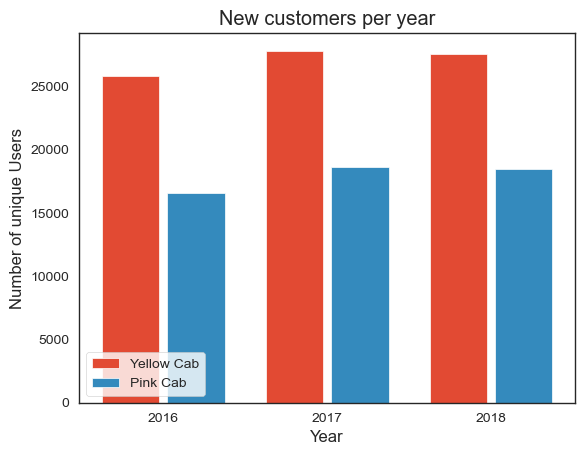

In [719]:
# Vizualize customer growth per year
X = ['2016', '2017', '2018']
Y = y_users_df['Users']
Z = p_users_df['Users']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.35, label = 'Yellow Cab')
plt.bar(X_axis + 0.2, Z, 0.35, label = 'Pink Cab')

plt.xticks(X_axis, X)
plt.xlabel('Year')
plt.ylabel('Number of unique Users')
plt.title('New customers per year')
plt.legend(loc = 3)
plt.show()

In [706]:
y_growth = ((y_users_df['Users'].iloc[-1] / y_users_df['Users'].iloc[-2]) ** (1/1)) - 1
p_growth = ((p_users_df['Users'].iloc[-1] / p_users_df['Users'].iloc[-2]) ** (1/1)) - 1

print("Annual user growth rate of Yellow Cab is: {:.2%}".format(y_growth))
print("Annual user growth rate of Pink Cab is: {:.2%}".format(p_growth))

Annual user growth rate of Yellow Cab is: -0.98%
Annual user growth rate of Pink Cab is: -0.93%
